Points to improve:
-Date data can be added

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
hotel_res= pd.read_csv('Hotel Reservations.csv')
hotel_res.info()
hotel_res.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [27]:
hotel_res.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [28]:
hotel_res['arrival_date'] = pd.to_datetime(hotel_res.apply(lambda row: f"{int(row['arrival_year'])}-{int(row['arrival_month'])}-{int(row['arrival_date'])}", axis=1), errors='coerce')
hotel_res.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled


In [29]:
hotel_res.isnull().sum()
data_na = (hotel_res.isnull().sum() / len(hotel_res)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
arrival_date,0.101999


In [30]:
hotel_res.dropna(inplace=True)
hotel_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36238 non-null  object        
 1   no_of_adults                          36238 non-null  int64         
 2   no_of_children                        36238 non-null  int64         
 3   no_of_weekend_nights                  36238 non-null  int64         
 4   no_of_week_nights                     36238 non-null  int64         
 5   type_of_meal_plan                     36238 non-null  object        
 6   required_car_parking_space            36238 non-null  int64         
 7   room_type_reserved                    36238 non-null  object        
 8   lead_time                             36238 non-null  int64         
 9   arrival_year                          36238 non-null  int64         
 10

In [31]:
hotel_res.duplicated().sum()

0

In [32]:
# Assuming you have a DataFrame named 'df'
column_counts = {}

# Iterate over each column in the DataFrame
for column in hotel_res.columns:
    column_counts[column] = hotel_res[column].value_counts()

# Print the value counts for each column
for column, counts in column_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)

Value counts for column 'Booking_ID':
INN00001    1
INN24189    1
INN24183    1
INN24184    1
INN24185    1
           ..
INN12089    1
INN12088    1
INN12087    1
INN12086    1
INN36275    1
Name: Booking_ID, Length: 36238, dtype: int64
Value counts for column 'no_of_adults':
2    26091
1     7676
3     2316
0      139
4       16
Name: no_of_adults, dtype: int64
Value counts for column 'no_of_children':
0     33544
1      1616
2      1056
3        19
9         2
10        1
Name: no_of_children, dtype: int64
Value counts for column 'no_of_weekend_nights':
0    16872
1     9959
2     9071
3      152
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
Value counts for column 'no_of_week_nights':
2     11433
1      9481
3      7829
4      2989
0      2383
5      1611
6       189
7       112
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
Value cou

In [33]:
# Define the threshold for identifying outliers (e.g., z-score threshold)
z_score_threshold = 3

# Iterate over each numerical column
for column in hotel_res.select_dtypes(include=np.number):
    # Calculate the z-scores for each value in the column
    z_scores = (hotel_res[column] - hotel_res[column].mean()) / hotel_res[column].std()
    
    # Identify the outliers based on the z-score threshold
    outliers = hotel_res[abs(z_scores) > z_score_threshold]
    
    # Remove the outliers from the DataFrame
    hotel_res = hotel_res.drop(outliers.index)

# Print the updated DataFrame
print(hotel_res)

      Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
0       INN00001             2  ...                       0    Not_Canceled
1       INN00002             2  ...                       1    Not_Canceled
2       INN00003             1  ...                       0        Canceled
3       INN00004             2  ...                       0        Canceled
4       INN00005             2  ...                       0        Canceled
...          ...           ...  ...                     ...             ...
36270   INN36271             3  ...                       1    Not_Canceled
36271   INN36272             2  ...                       2        Canceled
36272   INN36273             2  ...                       2    Not_Canceled
36273   INN36274             2  ...                       0        Canceled
36274   INN36275             2  ...                       0    Not_Canceled

[31409 rows x 19 columns]


In [34]:
# Assuming you have a DataFrame named 'df'
column_counts = {}

# Iterate over each column in the DataFrame
for column in hotel_res.columns:
    column_counts[column] = hotel_res[column].value_counts()

# Print the value counts for each column
for column, counts in column_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)

Value counts for column 'Booking_ID':
INN00001    1
INN24205    1
INN24203    1
INN24202    1
INN24201    1
           ..
INN12147    1
INN12146    1
INN12145    1
INN12144    1
INN36275    1
Name: Booking_ID, Length: 31409, dtype: int64
Value counts for column 'no_of_adults':
2    23070
1     6328
3     2011
Name: no_of_adults, dtype: int64
Value counts for column 'no_of_children':
0    30027
1     1382
Name: no_of_children, dtype: int64
Value counts for column 'no_of_weekend_nights':
0    14537
1     8800
2     7996
3       76
Name: no_of_weekend_nights, dtype: int64
Value counts for column 'no_of_week_nights':
2    10193
1     7993
3     7067
4     2725
0     1882
5     1402
6      147
Name: no_of_week_nights, dtype: int64
Value counts for column 'type_of_meal_plan':
Meal Plan 1     23799
Not Selected     4763
Meal Plan 2      2847
Name: type_of_meal_plan, dtype: int64
Value counts for column 'required_car_parking_space':
0    31409
Name: required_car_parking_space, dtype: int64
Val

In [35]:

hotel_res['no_of_adults'] = hotel_res['no_of_adults'].astype('category')
hotel_res['no_of_children'] = hotel_res['no_of_children'].astype('category')
hotel_res['no_of_weekend_nights'] = hotel_res['no_of_weekend_nights'].astype('category')
hotel_res['no_of_week_nights'] = hotel_res['no_of_week_nights'].astype('category')
hotel_res['no_of_special_requests'] = hotel_res['no_of_special_requests'].astype('category')
hotel_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31409 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            31409 non-null  object        
 1   no_of_adults                          31409 non-null  category      
 2   no_of_children                        31409 non-null  category      
 3   no_of_weekend_nights                  31409 non-null  category      
 4   no_of_week_nights                     31409 non-null  category      
 5   type_of_meal_plan                     31409 non-null  object        
 6   required_car_parking_space            31409 non-null  int64         
 7   room_type_reserved                    31409 non-null  object        
 8   lead_time                             31409 non-null  int64         
 9   arrival_year                          31409 non-null  int64         
 10

In [36]:
hotel_res = hotel_res.drop(['Booking_ID','arrival_year', 'arrival_month','arrival_date' ,'required_car_parking_space', 'repeated_guest', 'no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1)
categorical = hotel_res.select_dtypes(include=["object"]).columns.tolist()
numerical = hotel_res.select_dtypes(exclude=["object"]).columns.tolist()
hotel_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31409 entries, 0 to 36274
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   no_of_adults            31409 non-null  category
 1   no_of_children          31409 non-null  category
 2   no_of_weekend_nights    31409 non-null  category
 3   no_of_week_nights       31409 non-null  category
 4   type_of_meal_plan       31409 non-null  object  
 5   room_type_reserved      31409 non-null  object  
 6   lead_time               31409 non-null  int64   
 7   market_segment_type     31409 non-null  object  
 8   avg_price_per_room      31409 non-null  float64 
 9   no_of_special_requests  31409 non-null  category
 10  booking_status          31409 non-null  object  
dtypes: category(5), float64(1), int64(1), object(4)
memory usage: 1.8+ MB


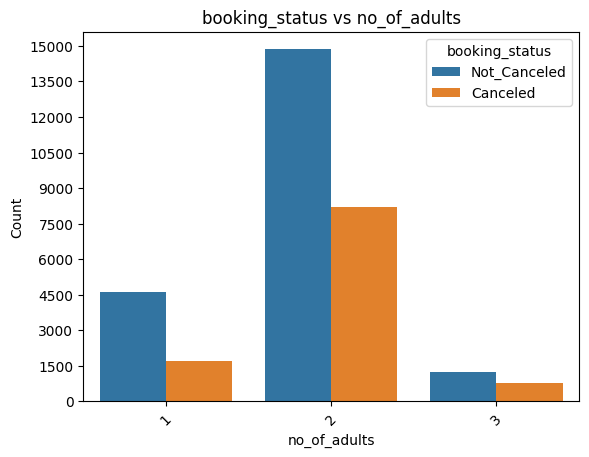

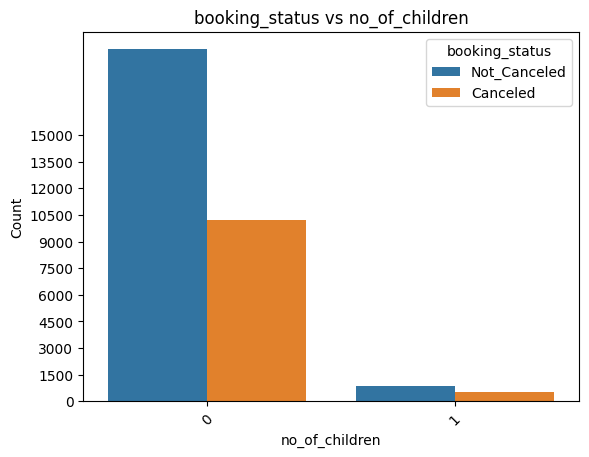

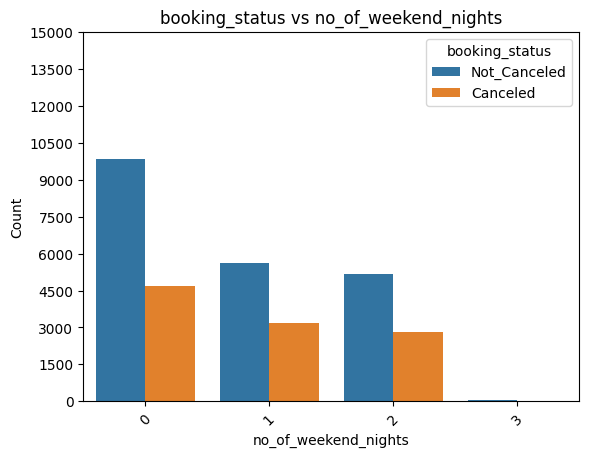

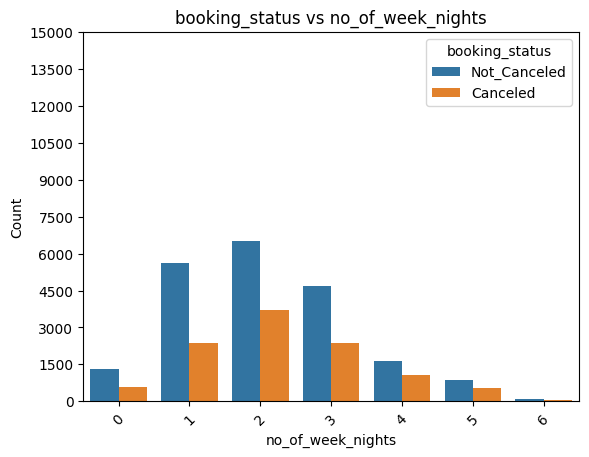

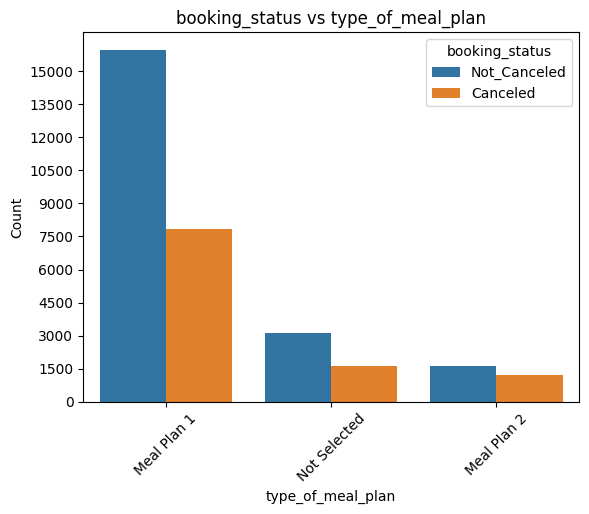

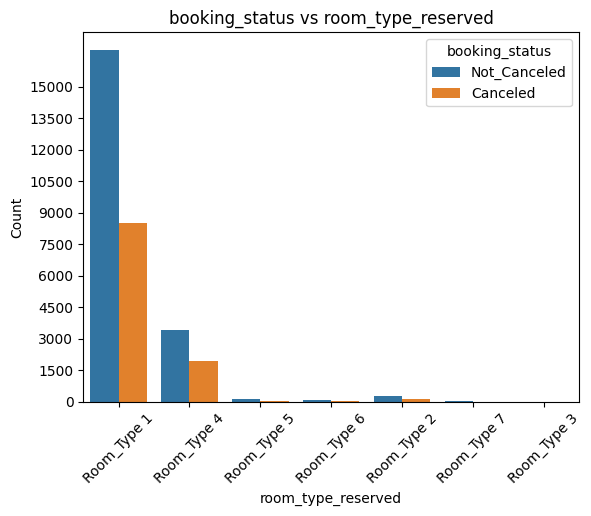

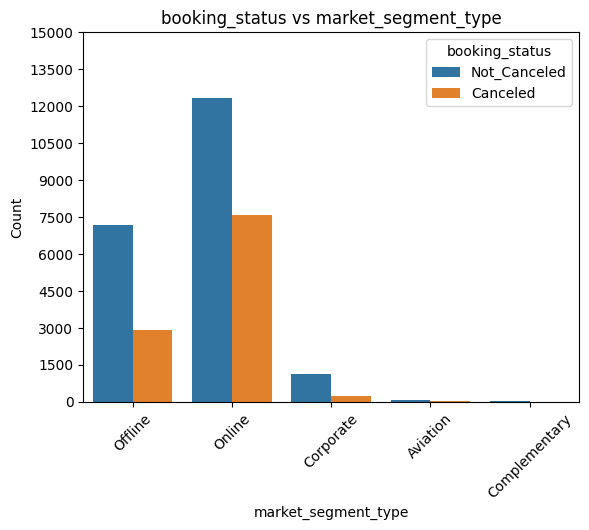

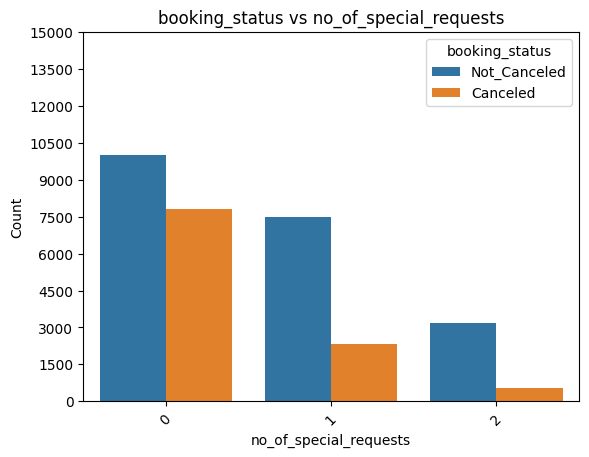

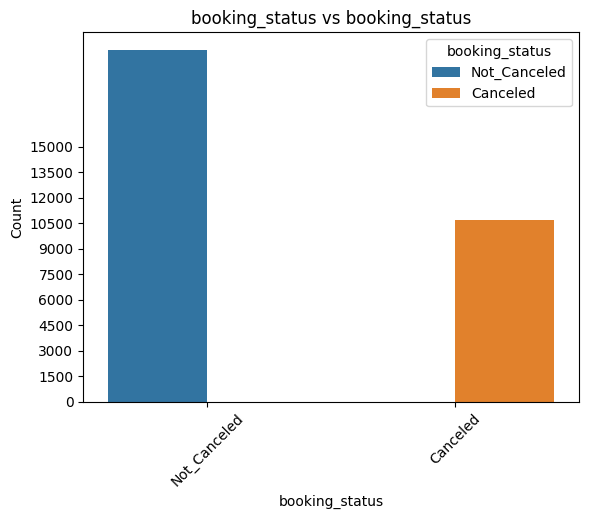

In [37]:
# Iterate over each categorical predictor variable
for column in hotel_res.select_dtypes(include=['object', 'category']):
    # Create a count plot for the current predictor variable
    sns.countplot(x=column, hue='booking_status', data=hotel_res)
    
    # Add labels and title
    plt.xlabel(column)
    plt.yticks(np.arange(0, 16000, 1500))
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(f'booking_status vs {column}')
    
    # Display the plot
    plt.show()

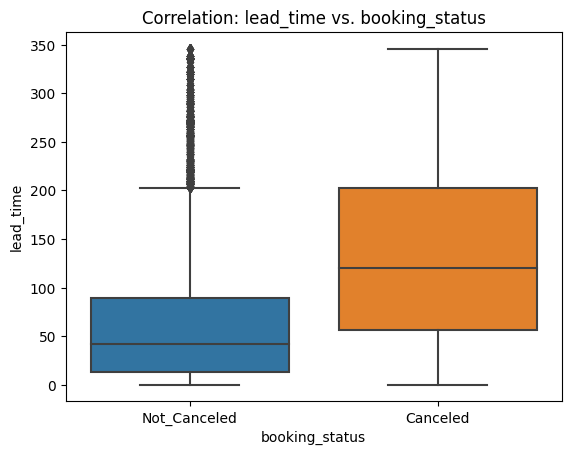

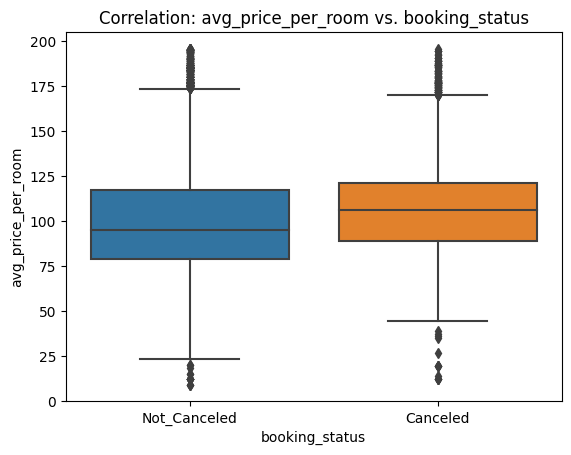

In [38]:
# Iterate over each numerical predictor variable
for column in hotel_res.select_dtypes(include=['float', 'int']):
    # Create a box plot or violin plot
    sns.boxplot(x='booking_status', y=column, data=hotel_res)
    
    # Add labels and title
    plt.xlabel('booking_status')
    plt.ylabel(column)
    plt.title(f'Correlation: {column} vs. booking_status')
    
    # Display the plot
    plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for column in hotel_res.select_dtypes(include=['object', 'category']):
    
    label_encoder = LabelEncoder()
    label_encoder.fit(hotel_res[column])
    hotel_res[column] = label_encoder.transform(hotel_res[column])
    print(f"{column}: {hotel_res[column].unique()}")

no_of_adults: [1 0 2]
no_of_children: [0 1]
no_of_weekend_nights: [1 2 0 3]
no_of_week_nights: [2 3 1 4 0 5 6]
type_of_meal_plan: [0 2 1]
room_type_reserved: [0 3 4 5 1 6 2]
market_segment_type: [3 4 2 0 1]
no_of_special_requests: [0 1 2]
booking_status: [1 0]


In [40]:
hotel_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31409 entries, 0 to 36274
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   no_of_adults            31409 non-null  int64  
 1   no_of_children          31409 non-null  int64  
 2   no_of_weekend_nights    31409 non-null  int64  
 3   no_of_week_nights       31409 non-null  int64  
 4   type_of_meal_plan       31409 non-null  int64  
 5   room_type_reserved      31409 non-null  int64  
 6   lead_time               31409 non-null  int64  
 7   market_segment_type     31409 non-null  int64  
 8   avg_price_per_room      31409 non-null  float64
 9   no_of_special_requests  31409 non-null  int64  
 10  booking_status          31409 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.9 MB


In [41]:
from sklearn.model_selection import train_test_split
x = hotel_res.drop(columns=["booking_status"])
y = hotel_res["booking_status"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC()
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard')

In [43]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest', RandomForestClassifier()),
                             ('support_vector_machine', SVC())])

In [44]:
from sklearn.metrics import accuracy_score

for clf in (log, rnd, svm, voting):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7814390321553646
RandomForestClassifier 0.8764724609996817
SVC 0.7567653613498886
VotingClassifier 0.8135943966889526


In [45]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [49]:
rfc = RandomForestClassifier(random_state=42, max_features= 'sqrt', n_estimators=200, class_weight='balanced', max_depth=None)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 87.6 %


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8759949060808659
Precision Score :  0.8759949060808659
Recall Score :  0.8759949060808659
Jaccard Score :  0.7793513666619459
Log Loss :  4.283044034133654


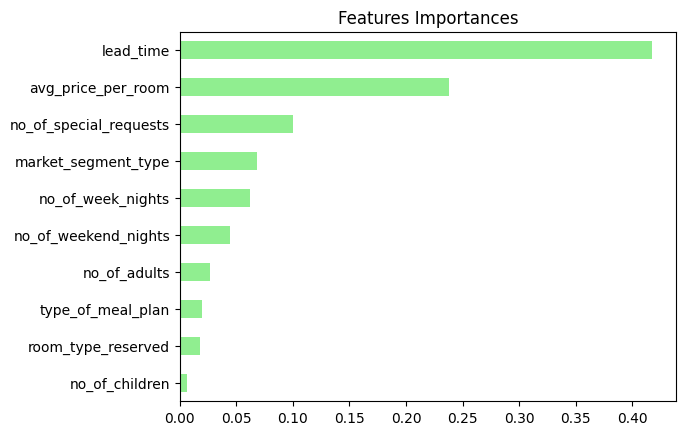

In [52]:
import pandas as pd
# Create a pd.Series of features importances
importances = pd.Series(data=rfc.feature_importances_,
                        index= x_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()